<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Python BootCamp </h1>
        <a href="https://masters.em-lyon.com/en/msc-in-digital-marketing-data-science">[Emlyon]</a> MSc in Digital Marketing & Data Science (DMDS) <br/>
         September 2022, Paris | © Saeed VARASTEH [RP] | Lucas VILLAIN
    </span>
</div>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#fff4e3;">
    <img src="images/homework.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#db9425">
        <h4 style="padding-top:25px;"> HOMEWORK 07 </h4>
    </span>
</div>

### Homework 07 - Marketing Campaign

---

The aim of this exercise is to evaluate your abilities for applying your theoretical knowledge to a practical case in the universe of online advertising.

<h4>Description of the dataset</h4>

The dataset __campaign.csv__ contains a full day of impressions for one particular mobile campaign. Each row corresponds to an impression. The characteristics of each impression are presented in columns and we are more particularly interested in the outcome of the impression: the occurrence of a click or the occurrence of a conversion following a click. The list of columns is classified below by topic:

unixtimestamp of impression <br/>
admantx <span style="color:gray">(external partner which indicate interests of given user)</span>  <br/>
exelate <span style="color:gray">(external partner which indicate interests of given user)</span>  <br/>
browserHeight / browserWidth / deviceHeight / deviceWidth / documentHeight / documentWidth last24hClicks / last24hClicksOnAdvertiser / ... <span style="color:gray">(historic interactions of given user with our inventory)</span> <br/>
browserLanguage / browserName / os <br/>
adSpaceId / adSpacePrimaryThematic <br/>
city <br/>
formatId / containerId / advertiserId / creativeId <br/>
deviceReferrer <br/>
click <br/>
conversion <br/>

__Your Task__

Read and clean the dataset (remove missing values, select relevant columns, and convert column types if necessary).

Explore data, create visualizations, and look for patterns. Try to find the relationship between the features and the occurrence of a click.

Use a statistical method that can identify the factors (features, columns) which seem to be the most influential for a click occurrence.

Comment/document everything.

# Outline of anaylsis
- 1.) Analyzing conversion and click count
- 2.) Analyzing conversion performance for the people who clicked in the last 24 hours
- 3.) Analysis on conversion and cities
- 4.) Analysis on clicks and cities
- 5.) Primary Ad Space Thematic and Conversion Analysis
- 6.) Primary Ad Space Thematic and Click Analysis
- 7.) Summary




In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# your code
pd.pandas.set_option('display.max_columns', None) # making sure the df displayed will have all the columns
df = pd.read_csv("campaign.csv")
df.head(5)




,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,admantx_home_and_garden,admantx_law_govt_and_politics,admantx_news,admantx_finance,admantx_society,admantx_science,admantx_pets,admantx_sports,admantx_style_and_fashion,admantx_technology_and_computing,admantx_travel,admantx_real_estate,admantx_shopping,admantx_religion_and_spirituality,browserHeight,browserWidth,deviceHeight,deviceWidth,documentHeight,documentWidth,exelate_auto_buyers,exelate_auto_owners,exelate_beauty_and_style,exelate_business,exelate_charitable_donors,exelate_cpg,exelate_diet_and_fitness,exelate_entertainment,exelate_events,exelate_finance,exelate_finance_and_insurance,exelate_general_interest,exelate_hobbies,exelate_home_improvement,exelate_internet_connection_type,exelate_language,exelate_parenting,exelate_pets,exelate_propensity,exelate_purchase_behaviors,exelate_seasonal,exelate_services,exelate_shopping,exelate_sports,exelate_tech_enthusiasts,exelate_tickets,exelate_travel,exelate_tv_viewership,last24hClicks,last24hClicksOnAdvertiser,last24hClicksOnContainer,last24hClicksOnFormat,last24hIframeClosings,last24hIframeClosingsOnAdvertiser,last24hIframeClosingsOnContainer,last24hIframeClosingsOnFormat,last24hImpressions,last24hImpressionsOnAdvertiser,last24hImpressionsOnContainer,last24hImpressionsOnFormat,last24hAdClosings,last24hAdClosingsOnAdvertiser,last24hAdClosingsOnContainer,last24hAdClosingsOnFormat,last30minClicks,last30minClicksOnAdvertiser,last30minClicksOnContainer,last30minClicksOnFormat,last30minIframeClosings,last30minIframeClosingsOnAdvertiser,last30minIframeClosingsOnContainer,last30minIframeClosingsOnFormat,last30minImpressions,last30minImpressionsOnAdvertiser,last30minImpressionsOnContainer,last30minImpressionsOnFormat,last30minAdClosings,last30minAdClosingsOnAdvertiser,last30minAdClosingsOnContainer,last30minAdClosingsOnFormat,last7dClicks,last7dClicksOnAdvertiser,last7dClicksOnContainer,last7dClicksOnFormat,last7dIframeClosings,last7dIframeClosingsOnAdvertiser,last7dIframeClosingsOnContainer,last7dIframeClosingsOnFormat,last7dImpressions,last7dImpressionsOnAdvertiser,last7dImpressionsOnContainer,last7dImpressionsOnFormat,last7dAdClosings,last7dAdClosingsOnAdvertiser,last7dAdClosingsOnContainer,last7dAdClosingsOnFormat,last30dClicks,last30dClicksOnAdvertiser,last30dClicksOnContainer,last30dClicksOnFormat,last30dIframeClosings,last30dIframeClosingsOnAdvertiser,last30dIframeClosingsOnContainer,last30dIframeClosingsOnFormat,last30dImpressions,last30dImpressionsOnAdvertiser,last30dImpressionsOnContainer,last30dImpressionsOnFormat,last30dAdClosings,last30dAdClosingsOnAdvertiser,last30dAdClosingsOnContainer,last30dAdClosingsOnFormat,adSpaceId,browserLangage,browserName,os,city,adSpacePrimaryThematic,deviceReferrer,formatId,containerId,advertiserId,creativeId,click,conversion
0,1493337601,41.837,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.0,58.163,0.0,0.0,0.0,0.0,559,375,667,375,6342,375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1170,fr,Facebook,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,other,111,8338,310,24595,0,0
1,1493337602,14.431,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,29.98,0.0,0.0,3.963,16.26,0.0,35.366,0.0,0.000,0.0,0.0,0.0,0.0,460,320,568,320,7090,320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,616,fr,Mobile Safari,iOS,Joeuf,NEWS,other,111,8338,310,24595,0,0
2,1493337615,63.729,0.0,0.0,0.0,0.0,5.109,0.0,0.0,0.0,0.0,0.00,0.0,0.0,7.407,0.00,0.0,18.391,0.0,5.364,0.0,0.0,0.0,0.0,645,375,667,375,7921,375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

---

In [20]:
# first batch of columns for cleaning, from browserheight to last24hIframeClosingsOnContainer

df = df.drop(columns=["browserHeight", "browserWidth", "deviceHeight", "deviceWidth", "documentHeight", "documentWidth", "last24hClicksOnAdvertiser", "last24hClicksOnContainer", "last24hClicksOnFormat", "last24hIframeClosings", "last24hIframeClosingsOnAdvertiser", "last24hIframeClosingsOnContainer"])

In [21]:
# second batch of columns for cleaning, from last24hImpressionsOnAdvertiser to last30minIframeClosingsOnFormat

df = df.drop(columns=["last24hImpressionsOnAdvertiser", "last24hImpressionsOnContainer", "last24hImpressionsOnFormat", "last24hAdClosings", "last24hAdClosingsOnAdvertiser", "last24hAdClosingsOnContainer", "last24hAdClosingsOnFormat", "last30minClicksOnAdvertiser", "last30minClicksOnContainer", "last30minClicksOnFormat", "last30minIframeClosings", "last30minIframeClosingsOnAdvertiser", "last30minIframeClosingsOnContainer", "last30minIframeClosingsOnFormat"])

In [22]:
# third batch of column cleaning, from last30minImpressionsOnAdvertiser to last30dIframeClosingsOnFormat

df = df.drop(columns=["last30minImpressionsOnAdvertiser", "last30minImpressionsOnContainer", "last30minImpressionsOnFormat", "last30minAdClosings", "last30minAdClosingsOnAdvertiser", "last30minAdClosingsOnContainer", "last30minAdClosingsOnFormat", "last7dClicksOnAdvertiser", "last7dClicksOnContainer", "last7dClicksOnFormat", "last7dIframeClosings", "last7dIframeClosingsOnAdvertiser", "last7dIframeClosingsOnContainer", "last7dIframeClosingsOnFormat", "last7dImpressionsOnAdvertiser", "last7dImpressionsOnContainer", "last7dImpressionsOnFormat", "last7dAdClosings", "last7dAdClosingsOnAdvertiser", "last7dAdClosingsOnContainer", "last7dAdClosingsOnFormat", "last30dClicksOnAdvertiser", "last30dClicksOnContainer", "last30dClicksOnFormat", "last30dIframeClosings", "last30dIframeClosingsOnAdvertiser", "last30dIframeClosingsOnContainer", "last30dIframeClosingsOnFormat"])

In [23]:
# fourth batch of column cleaning, from last24hIframeClosingsOnFormat to advertiserId

df = df.drop(columns=["last24hIframeClosingsOnFormat", "last30dImpressionsOnAdvertiser", "last30dImpressionsOnContainer", "last30dImpressionsOnFormat", "last30dAdClosings", "last30dAdClosingsOnAdvertiser", "last30dAdClosingsOnContainer", "last30dAdClosingsOnFormat", "deviceReferrer", "formatId", "containerId", "advertiserId"])


# DF with redundant columns removed
will use this dataframe below

In [24]:
df.head(5)

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,admantx_home_and_garden,admantx_law_govt_and_politics,admantx_news,admantx_finance,admantx_society,admantx_science,admantx_pets,admantx_sports,admantx_style_and_fashion,admantx_technology_and_computing,admantx_travel,admantx_real_estate,admantx_shopping,admantx_religion_and_spirituality,exelate_auto_buyers,exelate_auto_owners,exelate_beauty_and_style,exelate_business,exelate_charitable_donors,exelate_cpg,exelate_diet_and_fitness,exelate_entertainment,exelate_events,exelate_finance,exelate_finance_and_insurance,exelate_general_interest,exelate_hobbies,exelate_home_improvement,exelate_internet_connection_type,exelate_language,exelate_parenting,exelate_pets,exelate_propensity,exelate_purchase_behaviors,exelate_seasonal,exelate_services,exelate_shopping,exelate_sports,exelate_tech_enthusiasts,exelate_tickets,exelate_travel,exelate_tv_viewership,last24hClicks,last24hImpressions,last30minClicks,last30minImpressions,last7dClicks,last7dImpressions,last30dClicks,last30dImpressions,adSpaceId,browserLangage,browserName,os,city,adSpacePrimaryThematic,creativeId,click,conversion
0,1493337601,41.837,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.0,58.163,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1170,fr,Facebook,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,24595,0,0
1,1493337602,14.431,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,29.98,0.0,0.0,3.963,16.26,0.0,35.366,0.0,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,616,fr,Mobile Safari,iOS,Joeuf,NEWS,24595,0,0
2,1493337615,63.729,0.0,0.0,0.0,0.0,5.109,0.0,0.0,0.0,0.0,0.00,0.0,0.0,7.407,0.00,0.0,18.391,0.0,5.364,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5172,fr,Facebook,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,24595,0,0
3,1493337703,43.345,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,33.447,0.00,0.0,9.556,0.0,13.652,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1219,fr,Mobile Safari,iOS,Vigneux-sur-seine,ART_AND_ENTERTAINMENT,24595,0,0
4,1493337828,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5172,fr,Facebook,iOS,Barbey,ART_AND_ENTERTAINMENT,24595,0,0


In [25]:
print(df.shape)

(962973, 69)


# 1.) Analyzing conversion and click count

In [26]:
#conversion count, 0 is not converted, 1 is converted

conversion_count_series = df.groupby('conversion')['timestamp'].count()
conversion_count_df = pd.DataFrame(conversion_count_series)
conversion_count_df.rename(columns={'timestamp':'conversion count'}, inplace=True)
conversion_count_df

,conversion count
conversion,
0,962556
1,417


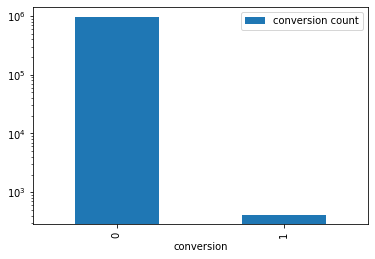

In [27]:
dfconversion = pd.DataFrame(conversion_count_df, columns=[ 'conversion count'])
dfconversion.plot.bar()

plt.yscale("log")
plt.show()

In [ ]:
#conversion_count_df.plot.bar(label='Number of conversions', rot = 0)
#need to edit this bar plot, make it look better

In [28]:
# checking click count, 0 is no click, 1 is click

click_count_series = df.groupby('click')['timestamp'].count()
click_count_df = pd.DataFrame(click_count_series)
click_count_df.rename(columns={'timestamp':'click count'}, inplace=True)
click_count_df

,click count
click,
0,868247
1,94726


<AxesSubplot:xlabel='click'>

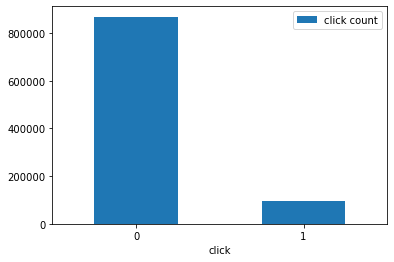

In [29]:
click_count_df.plot.bar(label='Number of clicks', rot = 0)

In [30]:
conversion = 417
clicks = 94726
conversion_rate = (conversion / clicks) * 100
print(conversion_rate)

0.44021704706205267


The mobile campaign has a total of 94,726 clicks, and 417 conversions recorded.
Making the conversion rate 0.44%

In [31]:
# add a pie chart comparing clicks to conversions

pie_df = pd.DataFrame({'objective': ['click', 'conversion'],
                   'counts': [94726, 417,]})

In [15]:
print(pie_df)

    objective  counts
0       click   94726
1  conversion     417


<AxesSubplot:ylabel='counts'>

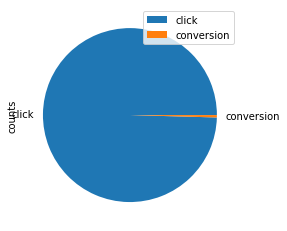

In [35]:
pie_df.groupby(['objective']).sum().plot(kind='pie', y='counts')

In [17]:
print("The conversion rate of the campaign at ", conversion_rate , "is very small.")

The conversion rate of the campaign at  0.44021704706205267 is very small.


# Conclusion from analysis 1
- The mobile campaign has a total of 94,726 clicks, and 417 conversions recorded. Making the conversion rate 0.44%
- Not enough data to make a conclusion whether it is a low conversion rate or not. Product being promoted was not mentioned
- But in general 0.44% conversion rate is relatively low

# 2.) Analyzing conversion performance for the people who clicked in the last 24 hours

In [18]:
df.head(5)

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,admantx_home_and_garden,admantx_law_govt_and_politics,admantx_news,admantx_finance,admantx_society,admantx_science,admantx_pets,admantx_sports,admantx_style_and_fashion,admantx_technology_and_computing,admantx_travel,admantx_real_estate,admantx_shopping,admantx_religion_and_spirituality,exelate_auto_buyers,exelate_auto_owners,exelate_beauty_and_style,exelate_business,exelate_charitable_donors,exelate_cpg,exelate_diet_and_fitness,exelate_entertainment,exelate_events,exelate_finance,exelate_finance_and_insurance,exelate_general_interest,exelate_hobbies,exelate_home_improvement,exelate_internet_connection_type,exelate_language,exelate_parenting,exelate_pets,exelate_propensity,exelate_purchase_behaviors,exelate_seasonal,exelate_services,exelate_shopping,exelate_sports,exelate_tech_enthusiasts,exelate_tickets,exelate_travel,exelate_tv_viewership,last24hClicks,last24hImpressions,last30minClicks,last30minImpressions,last7dClicks,last7dImpressions,last30dClicks,last30dImpressions,adSpaceId,browserLangage,browserName,os,city,adSpacePrimaryThematic,creativeId,click,conversion
0,1493337601,41.837,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.0,58.163,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1170,fr,Facebook,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,24595,0,0
1,1493337602,14.431,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,29.98,0.0,0.0,3.963,16.26,0.0,35.366,0.0,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,616,fr,Mobile Safari,iOS,Joeuf,NEWS,24595,0,0
2,1493337615,63.729,0.0,0.0,0.0,0.0,5.109,0.0,0.0,0.0,0.0,0.00,0.0,0.0,7.407,0.00,0.0,18.391,0.0,5.364,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5172,fr,Facebook,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,24595,0,0
3,1493337703,43.345,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,33.447,0.00,0.0,9.556,0.0,13.652,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1219,fr,Mobile Safari,iOS,Vigneux-sur-seine,ART_AND_ENTERTAINMENT,24595,0,0
4,1493337828,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5172,fr,Facebook,iOS,Barbey,ART_AND_ENTERTAINMENT,24595,0,0


In [19]:
# showing data how many times they clicked the last 24 hours
# 0 is no click, 1 is clicked once, 2 is clicked twice, 3 is clicked thrice

df["last24hClicks"].value_counts()

0    955062
1      7719
2       175
3        17
Name: last24hClicks, dtype: int64

A total of 7911 clicks happened in the last 24 hours
7719 people clicked once, 175 clicked twice and 17 clicked thrice

In [20]:
twentyfourhourclicksDF = pd.DataFrame({'timesclicked': ['1', '2','3'],
                   'reps': [7719, 175,17]})
print(twentyfourhourclicksDF)

  timesclicked  reps
0            1  7719
1            2   175
2            3    17


<AxesSubplot:xlabel='timesclicked'>

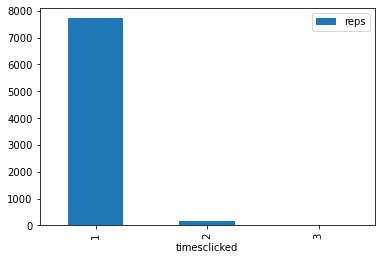

In [21]:
# creating a visualization for this times click in the last 24 hours data

twentyfourhourclicksDF.groupby(['timesclicked']).sum().plot(kind='bar', y='reps')

From these 7911 who clicked within the last 24 hours, how many were converted?

In [22]:
#checking which of the 7911 who clicked in the last 24 hours led to conversions

conversion24hr_count_series = df.groupby('last24hClicks')['conversion'].sum()
conversion24hr_count_df = pd.DataFrame(conversion24hr_count_series)
conversion24hr_count_df.rename(columns={'timestamp':'conversion count'}, inplace=True)
conversion24hr_count_df

,conversion
last24hClicks,
0,413
1,4
2,0
3,0


<AxesSubplot:xlabel='last24hClicks'>

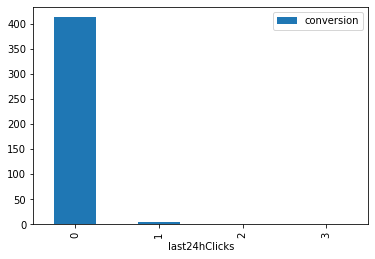

In [23]:
# bar graph visualizing the conversions from the clicks of the last 24 hours

conversion24hr_count_df.groupby(['last24hClicks']).sum().plot(kind='bar', y='conversion')

# Conclusions from analysis 2
- A total of 7911 clicks happened in the last 24 hours 7719 people clicked once, 175 clicked twice and 17 clicked thrice
- Meaning most conversions, with 413, happened outside 24 hours and only 4 happend within the past 24 hours.
- The campaign is optimized to the consencious consumer and not the impulsive buyer. Suggesting that the item sold could be an item of the more expensive variety.

# Cleaning data further
Changing conversion column into yes or no

In [24]:
def convert_conversion(count):
    if count == 1:
        return 'Yes'
    else:
        return 'No'

In [25]:
# applying the created function (convert_conversion) to change conversion column from 1,0 to Yes,No

df['conversion'] = df["conversion"].apply(convert_conversion)

In [26]:
newdf = df[(df.conversion == "Yes")]

Filtering out all no's and leaving only yes in the conversion column of the DF

In [27]:
# all no's filtered out

newdf

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,admantx_home_and_garden,admantx_law_govt_and_politics,admantx_news,admantx_finance,admantx_society,admantx_science,admantx_pets,admantx_sports,admantx_style_and_fashion,admantx_technology_and_computing,admantx_travel,admantx_real_estate,admantx_shopping,admantx_religion_and_spirituality,exelate_auto_buyers,exelate_auto_owners,exelate_beauty_and_style,exelate_business,exelate_charitable_donors,exelate_cpg,exelate_diet_and_fitness,exelate_entertainment,exelate_events,exelate_finance,exelate_finance_and_insurance,exelate_general_interest,exelate_hobbies,exelate_home_improvement,exelate_internet_connection_type,exelate_language,exelate_parenting,exelate_pets,exelate_propensity,exelate_purchase_behaviors,exelate_seasonal,exelate_services,exelate_shopping,exelate_sports,exelate_tech_enthusiasts,exelate_tickets,exelate_travel,exelate_tv_viewership,last24hClicks,last24hImpressions,last30minClicks,last30minImpressions,last7dClicks,last7dImpressions,last30dClicks,last30dImpressions,adSpaceId,browserLangage,browserName,os,city,adSpacePrimaryThematic,creativeId,click,conversion
829,1493346098,46.860,6.044,0.000,0.000,0.0,3.140,0.000,0.000,0.000,0.000,0.000,0.0,0.0,20.094,0.000,0.0,3.532,7.692,4.945,7.692,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5172,fr,Facebook,iOS,Orange,ART_AND_ENTERTAINMENT,24595,1,Yes
1983,1493355416,8.551,0.000,0.000,8.551,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,11.159,0.000,0.0,71.739,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5172,fr,Facebook,iOS,Orange,ART_AND_ENTERTAINMENT,24595,1,Yes
7098,1493357653,61.282,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,13.846,0.000,0.0,0.000,24.872,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,3,0,3,1750,fr,Mobile Safari,iOS,Paris,ART_AND_ENTERTAINMENT,24595,1,Yes
9895,1493358063,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5326,fr,Facebook,iOS,Paris,ART_AND_ENTERTAINMENT,24595,1,Yes
10323,1493358264,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2931,fr,Mobile Safari,iOS,Orange,SPORTS,24595,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944420,1493421648,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1822,fr,Mobile Safari,iOS,Garches,NEWS,24595,1,Yes
945696,1493421818,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3371,fr,Facebook,iOS,Bagnolet,ART_AND_ENTERTAINMENT,24595,1,Yes
951485,1493422555,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2721,fr,Mobile Safari,iOS,Argenteuil,SOCIETY,24595,1,Yes
956720,1493423095,47.917,0.000,4.423,0.000,0.0,3.644,2.826,2.048,1.222,0.771,0.623,0.0,0.0,10.691,2.764,0.0,2.647,1.915,16.320,2.188,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,23,0,13,0,32,3863,fr,Mobi

In [28]:
newdf.shape

(417, 69)

# 3.) Analysis on conversion and cities
checking which city had the most conversions.

In [29]:
#checking which city converted the most

newdf["city"].value_counts() 

Paris                       138
Orange                       82
Aubervilliers                56
Courbevoie                   30
Latresne                     22
Garches                      19
Mions                        13
Toulouse                     11
Villeurbanne                  5
Strasbourg                    4
Amiens                        2
Bordeaux                      2
Montpellier                   2
Boulogne-billancourt          2
Clichy                        2
Bobigny                       2
Neuilly-sur-seine             1
Mantes-la-jolie               1
Pontoise                      1
Velizy-villacoublay           1
Libourne                      1
Bagnolet                      1
Epinay-sous-senart            1
Andresy                       1
Limeil-brevannes              1
Villemomble                   1
Puisseguin                    1
Arcueil                       1
Nantes                        1
La courneuve                  1
Istres                        1
Poitiers

In [30]:
# Cleaning up again by segmenting the top cities
# creating a function to convert cities with little conversions into other

def convert_city(count):
    if count == 'Paris':
        return 'Paris'
    elif count == 'Orange':
        return 'Orange'
    elif count == 'Aubrevilliers':
        return 'Aubervilliers'
    elif count == 'Courbevoie':
        return 'Courbevoie '
    elif count == 'Latresne':
        return 'Latresne'
    else:
        return 'other'

In [31]:
newdf['city'] = newdf["city"].apply(convert_city)

C:\Users\Marco Aradillos\AppData\Local\Temp\ipykernel_17040\996611124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['city'] = newdf["city"].apply(convert_city)


In [32]:
# Dataframe will only show top 5 converting cities

newdf

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,admantx_home_and_garden,admantx_law_govt_and_politics,admantx_news,admantx_finance,admantx_society,admantx_science,admantx_pets,admantx_sports,admantx_style_and_fashion,admantx_technology_and_computing,admantx_travel,admantx_real_estate,admantx_shopping,admantx_religion_and_spirituality,exelate_auto_buyers,exelate_auto_owners,exelate_beauty_and_style,exelate_business,exelate_charitable_donors,exelate_cpg,exelate_diet_and_fitness,exelate_entertainment,exelate_events,exelate_finance,exelate_finance_and_insurance,exelate_general_interest,exelate_hobbies,exelate_home_improvement,exelate_internet_connection_type,exelate_language,exelate_parenting,exelate_pets,exelate_propensity,exelate_purchase_behaviors,exelate_seasonal,exelate_services,exelate_shopping,exelate_sports,exelate_tech_enthusiasts,exelate_tickets,exelate_travel,exelate_tv_viewership,last24hClicks,last24hImpressions,last30minClicks,last30minImpressions,last7dClicks,last7dImpressions,last30dClicks,last30dImpressions,adSpaceId,browserLangage,browserName,os,city,adSpacePrimaryThematic,creativeId,click,conversion
829,1493346098,46.860,6.044,0.000,0.000,0.0,3.140,0.000,0.000,0.000,0.000,0.000,0.0,0.0,20.094,0.000,0.0,3.532,7.692,4.945,7.692,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5172,fr,Facebook,iOS,Orange,ART_AND_ENTERTAINMENT,24595,1,Yes
1983,1493355416,8.551,0.000,0.000,8.551,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,11.159,0.000,0.0,71.739,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5172,fr,Facebook,iOS,Orange,ART_AND_ENTERTAINMENT,24595,1,Yes
7098,1493357653,61.282,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,13.846,0.000,0.0,0.000,24.872,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,3,0,3,1750,fr,Mobile Safari,iOS,Paris,ART_AND_ENTERTAINMENT,24595,1,Yes
9895,1493358063,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5326,fr,Facebook,iOS,Paris,ART_AND_ENTERTAINMENT,24595,1,Yes
10323,1493358264,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2931,fr,Mobile Safari,iOS,Orange,SPORTS,24595,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944420,1493421648,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1822,fr,Mobile Safari,iOS,other,NEWS,24595,1,Yes
945696,1493421818,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3371,fr,Facebook,iOS,other,ART_AND_ENTERTAINMENT,24595,1,Yes
951485,1493422555,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2721,fr,Mobile Safari,iOS,other,SOCIETY,24595,1,Yes
956720,1493423095,47.917,0.000,4.423,0.000,0.0,3.644,2.826,2.048,1.222,0.771,0.623,0.0,0.0,10.691,2.764,0.0,2.647,1.915,16.320,2.188,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,23,0,13,0,32,3863,fr,Mobile Safari,

Creating visualazation of the cities that were converted.

In [33]:
cityconversion_count_series = newdf.groupby('city')['conversion'].count()
cityconversion_count_df = pd.DataFrame(cityconversion_count_series)
cityconversion_count_df.rename(columns={'timestamp':'conversion count'}, inplace=True)
cityconversion_count_df

,conversion
city,
Courbevoie,30
Latresne,22
Orange,82
Paris,138
other,145


In [34]:
# filtering it to make conversions ascending

cityconversion_count_df = cityconversion_count_df.head(12)
cityconversion_count_df = cityconversion_count_df.sort_values(["conversion"], ascending=[1]) 
cityconversion_count_df


,conversion
city,
Latresne,22
Courbevoie,30
Orange,82
Paris,138
other,145


<AxesSubplot:xlabel='city'>

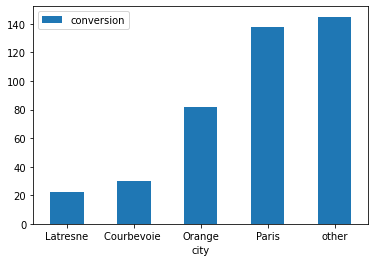

In [35]:
# visualizing the table

cityconversion_count_df.plot.bar(label='Sex', rot = 0)

# Conclusions from analysis 3
- The single city that converted the most was Paris with 138, then orange with 82 and so on
- All the smaller cities combined converted more than Paris, but only by 7 more conversions
- It would make better sense for the campaign to reallocate budget more on the top converting cities compared to targetting smaller cities

# 4.) Analysis on clicks and cities
checking which city had the most clicks.

In [36]:
#creating a function to filter out all those who didnt click

def convert_click(count):
    if count == 1:
        return "Yes"
    else:
        return "No"

In [37]:
df['click'] = df['click'].apply(convert_click)

In [38]:
clickdf = df[(df.click == "Yes")]

In [39]:
# new DF with only the ones who clicked remaining

clickdf

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,admantx_home_and_garden,admantx_law_govt_and_politics,admantx_news,admantx_finance,admantx_society,admantx_science,admantx_pets,admantx_sports,admantx_style_and_fashion,admantx_technology_and_computing,admantx_travel,admantx_real_estate,admantx_shopping,admantx_religion_and_spirituality,exelate_auto_buyers,exelate_auto_owners,exelate_beauty_and_style,exelate_business,exelate_charitable_donors,exelate_cpg,exelate_diet_and_fitness,exelate_entertainment,exelate_events,exelate_finance,exelate_finance_and_insurance,exelate_general_interest,exelate_hobbies,exelate_home_improvement,exelate_internet_connection_type,exelate_language,exelate_parenting,exelate_pets,exelate_propensity,exelate_purchase_behaviors,exelate_seasonal,exelate_services,exelate_shopping,exelate_sports,exelate_tech_enthusiasts,exelate_tickets,exelate_travel,exelate_tv_viewership,last24hClicks,last24hImpressions,last30minClicks,last30minImpressions,last7dClicks,last7dImpressions,last30dClicks,last30dImpressions,adSpaceId,browserLangage,browserName,os,city,adSpacePrimaryThematic,creativeId,click,conversion
5,1493337837,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1191,fr,Mobile Safari,iOS,Strasbourg,ART_AND_ENTERTAINMENT,24595,Yes,No
13,1493338946,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1191,fr,Mobile Safari,iOS,Cellieu,ART_AND_ENTERTAINMENT,24595,Yes,No
14,1493338954,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,12.245,20.408,0.0,0.0,67.347,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5506,fr,Facebook,iOS,Strasbourg,ART_AND_ENTERTAINMENT,24595,Yes,No
19,1493339242,4.825,1.754,0.0,0.0,0.0,31.628,0.0,0.0,14.474,1.462,0.0,0.0,0.0,28.850,2.583,0.0,0.0,9.649,4.776,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5506,fr,Facebook,iOS,Paris,ART_AND_ENTERTAINMENT,24595,Yes,No
21,1493337600,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1496,fr,Mobile Safari,iOS,Affoux,TECHNOLOGY_AND_COMPUTING,24595,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962925,1493423998,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2717,fr,Mobile Safari,iOS,Montreuil,FAMILY_AND_PARENTING,24595,Yes,No
962934,1493423896,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1750,fr,Mobile Safari,iOS,Boissy-fresnoy,ART_AND_ENTERTAINMENT,24595,Yes,No
962949,1493423832,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,100.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5906,fr,Facebook,iOS,Paris,NONE,24595,Yes,No
962962,1493423981,100.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4417,fr,Facebook,iOS,Bressuire,ART_AND_ENTERTAINMENT,24595,Yes,No


In [40]:
clickdf.shape

(94726, 69)

In [41]:
#checking which city clicked the most

clickdf["city"].value_counts()

Paris                   19643
Aubervilliers            4422
Orange                   2999
Toulouse                 1949
Courbevoie               1709
                        ...  
Chatillon-saint-jean        1
Sille-le-guillame           1
Agey                        1
Diesen                      1
Betheny                     1
Name: city, Length: 4082, dtype: int64

In [42]:
# get top 5 clicking cities, and make the rest other

def convert_cityclicks(count):
    if count == 'Paris':
        return 'Paris'
    elif count == 'Orange':
        return 'Orange'
    elif count == 'Aubrevilliers':
        return 'Aubervilliers'
    elif count == 'Courbevoie':
        return 'Courbevoie '
    elif count == 'Toulouse':
        return 'Toulouse'
    else:
        return 'other'

In [43]:
clickdf['city'] = clickdf["city"].apply(convert_city)

C:\Users\Marco Aradillos\AppData\Local\Temp\ipykernel_17040\1949218658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickdf['city'] = clickdf["city"].apply(convert_city)


In [44]:
# creating a table to show the click count per city

cityclick_count_series = clickdf.groupby('city')['click'].count()
cityclick_count__df = pd.DataFrame(cityclick_count_series)
cityclick_count__df.rename(columns={'click':'click count'}, inplace=True)
cityclick_count__df

,click count
city,
Courbevoie,1709
Latresne,1001
Orange,2999
Paris,19643
other,69374


In [45]:
# changing to ascending order

cityclick_count__df = cityclick_count__df.head(12)
cityclick_count__df = cityclick_count__df.sort_values(["click count"], ascending=[1]) 
cityclick_count__df


,click count
city,
Latresne,1001
Courbevoie,1709
Orange,2999
Paris,19643
other,69374


<AxesSubplot:xlabel='city'>

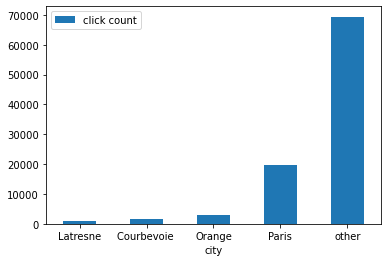

In [46]:
# visualizing the table above

cityclick_count__df.plot.bar(label='Sex', rot = 0)

In [47]:
#concating to get the click count and conversion comparrison per city

df_clickconvert = pd.concat([cityclick_count__df, cityconversion_count_df], axis=1)
df_clickconvert

,click count,conversion
city,,
Latresne,1001,22
Courbevoie,1709,30
Orange,2999,82
Paris,19643,138
other,69374,145


In [48]:
# getting click to conversion rate per city

df_clickconvert2 = pd.concat([cityclick_count__df, cityconversion_count_df], axis=1)
df_clickconvert2['click to conversion%'] = (df_clickconvert['conversion'] / df_clickconvert['click count']) * 100
df_clickconvert2

,click count,conversion,click to conversion%
city,,,
Latresne,1001,22,2.197802
Courbevoie,1709,30,1.755413
Orange,2999,82,2.734245
Paris,19643,138,0.702540
other,69374,145,0.209012


<AxesSubplot:xlabel='city'>

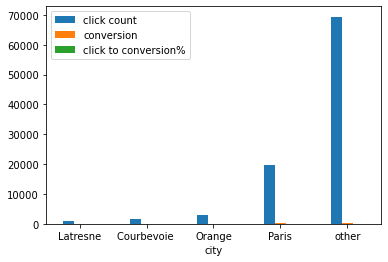

In [49]:
# try to make the conversion bigger
df_clickconvert2.plot.bar(label='Click to conversion', rot = 0)

# Conclusions from analysis 4
- A new city appeared in the top 5 when it comes to clicks, Toulouse, but this city is not in top 5 in conversions
- When just looking at conversions, it looks like Paris is the best converting city, however 
a deeper dive shows us that Orange has a higher chance of converting. 
- Orange is almost 4 times more likely to convert than Paris, with a 2.73% to Paris 0.70% conversion rate
- It could be possible to focus the campaign more on Orange, and revamp the campaign being run in Paris

# 5.) Primary Ad Space Thematic and Conversion Analysis
In which website (primary thematic) should we be putting our advertisements on

In [50]:
# primary analysis

counts = df.groupby(["adSpacePrimaryThematic","conversion"]).size().sort_values(ascending=False)
print(counts)
counts.tail(15)



adSpacePrimaryThematic    conversion
ART_AND_ENTERTAINMENT     No            483783
NEWS                      No            233946
SOCIETY                   No             55237
STYLE_AND_FASHION         No             43960
SPORTS                    No             43508
NONE                      No             37050
TECHNOLOGY_AND_COMPUTING  No             21300
BUSINESS                  No             16461
FAMILY_AND_PARENTING      No             13829
EDUCATION                 No              4108
REAL_ESTATE               No              3844
CAREERS                   No              2464
HEALTH_AND_FITNESS        No              1169
AUTOMOTIVE                No               727
HOME_AND_GARDEN           No               645
FOOD_AND_DRINK            No               466
ART_AND_ENTERTAINMENT     Yes              198
NEWS                      Yes              110
FINANCE                   No                31
HOBBIES_AND_INTERESTS     No                28
SOCIETY                

adSpacePrimaryThematic    conversion
NEWS                      Yes           110
FINANCE                   No             31
HOBBIES_AND_INTERESTS     No             28
SOCIETY                   Yes            24
SPORTS                    Yes            22
NONE                      Yes            20
STYLE_AND_FASHION         Yes            15
BUSINESS                  Yes             8
FAMILY_AND_PARENTING      Yes             6
TECHNOLOGY_AND_COMPUTING  Yes             6
HOME_AND_GARDEN           Yes             2
EDUCATION                 Yes             2
AUTOMOTIVE                Yes             2
HEALTH_AND_FITNESS        Yes             1
CAREERS                   Yes             1
dtype: int64

In [51]:
# create a DF that filtered out all no's in the conversion column
newdf

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,admantx_home_and_garden,admantx_law_govt_and_politics,admantx_news,admantx_finance,admantx_society,admantx_science,admantx_pets,admantx_sports,admantx_style_and_fashion,admantx_technology_and_computing,admantx_travel,admantx_real_estate,admantx_shopping,admantx_religion_and_spirituality,exelate_auto_buyers,exelate_auto_owners,exelate_beauty_and_style,exelate_business,exelate_charitable_donors,exelate_cpg,exelate_diet_and_fitness,exelate_entertainment,exelate_events,exelate_finance,exelate_finance_and_insurance,exelate_general_interest,exelate_hobbies,exelate_home_improvement,exelate_internet_connection_type,exelate_language,exelate_parenting,exelate_pets,exelate_propensity,exelate_purchase_behaviors,exelate_seasonal,exelate_services,exelate_shopping,exelate_sports,exelate_tech_enthusiasts,exelate_tickets,exelate_travel,exelate_tv_viewership,last24hClicks,last24hImpressions,last30minClicks,last30minImpressions,last7dClicks,last7dImpressions,last30dClicks,last30dImpressions,adSpaceId,browserLangage,browserName,os,city,adSpacePrimaryThematic,creativeId,click,conversion
829,1493346098,46.860,6.044,0.000,0.000,0.0,3.140,0.000,0.000,0.000,0.000,0.000,0.0,0.0,20.094,0.000,0.0,3.532,7.692,4.945,7.692,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5172,fr,Facebook,iOS,Orange,ART_AND_ENTERTAINMENT,24595,1,Yes
1983,1493355416,8.551,0.000,0.000,8.551,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,11.159,0.000,0.0,71.739,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5172,fr,Facebook,iOS,Orange,ART_AND_ENTERTAINMENT,24595,1,Yes
7098,1493357653,61.282,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,13.846,0.000,0.0,0.000,24.872,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,3,0,3,1750,fr,Mobile Safari,iOS,Paris,ART_AND_ENTERTAINMENT,24595,1,Yes
9895,1493358063,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5326,fr,Facebook,iOS,Paris,ART_AND_ENTERTAINMENT,24595,1,Yes
10323,1493358264,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2931,fr,Mobile Safari,iOS,Orange,SPORTS,24595,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944420,1493421648,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1822,fr,Mobile Safari,iOS,other,NEWS,24595,1,Yes
945696,1493421818,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3371,fr,Facebook,iOS,other,ART_AND_ENTERTAINMENT,24595,1,Yes
951485,1493422555,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2721,fr,Mobile Safari,iOS,other,SOCIETY,24595,1,Yes
956720,1493423095,47.917,0.000,4.423,0.000,0.0,3.644,2.826,2.048,1.222,0.771,0.623,0.0,0.0,10.691,2.764,0.0,2.647,1.915,16.320,2.188,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,23,0,13,0,32,3863,fr,Mobile Safari,

In [52]:
#segmenting the top 5 converting adspacethematics

def convert_adspacethematic(count):
    if count == 'ART_AND_ENTERTAINMENT':
        return 'ART_AND_ENTERTAINMENT'
    elif count == 'NEWS':
        return 'NEWS'
    elif count == 'SOCIETY':
        return 'SOCIETY'
    elif count == 'SPORTS':
        return 'SPORTS '
    elif count == 'NONE':
        return 'NONE'
    else:
        return 'other'


In [53]:
newdf['adSpacePrimaryThematic'] = newdf["adSpacePrimaryThematic"].apply(convert_adspacethematic)

C:\Users\Marco Aradillos\AppData\Local\Temp\ipykernel_17040\310533505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['adSpacePrimaryThematic'] = newdf["adSpacePrimaryThematic"].apply(convert_adspacethematic)


In [54]:
# creating a table for the top converting thematics

adspacetheme_count_series = newdf.groupby('adSpacePrimaryThematic')['conversion'].count()
adspacetheme_count_df = pd.DataFrame(adspacetheme_count_series)
adspacetheme_count_df.rename(columns={'conversion':'conversion count'}, inplace=True)
adspacetheme_count_df

,conversion count
adSpacePrimaryThematic,
ART_AND_ENTERTAINMENT,198
NEWS,110
NONE,20
SOCIETY,24
SPORTS,22
other,43


In [55]:
# changing to ascending order

adspacetheme_count_df = adspacetheme_count_df.head(12)
adspacetheme_count_df = adspacetheme_count_df.sort_values(["conversion count"], ascending=[1]) 
adspacetheme_count_df

,conversion count
adSpacePrimaryThematic,
NONE,20
SPORTS,22
SOCIETY,24
other,43
NEWS,110
ART_AND_ENTERTAINMENT,198


<AxesSubplot:xlabel='adSpacePrimaryThematic'>

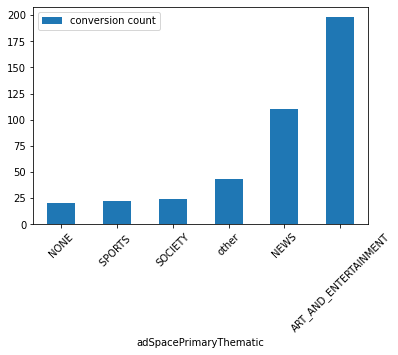

In [80]:
# visualization for the top converting thematics

adspacetheme_count_df.plot.bar(label='Sex', rot = 45, fontsize=10)

# Conclusions from analysis 5
- Art and entertainment is the top converting ad space primary thematic with 198 conversions
- News is the second thematic with 110 conversions
- Ads should be run in these two thematics as 73.8% of conversions come from these two types of categories

# 6.) Primary Ad Space Thematic and Click Analysis
In which website (primary thematic) are we getting the most clicks on

In [67]:
# create a DF that filtered out all no's in the count column

clickdf2 = clickdf
clickdf2

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,admantx_home_and_garden,admantx_law_govt_and_politics,admantx_news,admantx_finance,admantx_society,admantx_science,admantx_pets,admantx_sports,admantx_style_and_fashion,admantx_technology_and_computing,admantx_travel,admantx_real_estate,admantx_shopping,admantx_religion_and_spirituality,exelate_auto_buyers,exelate_auto_owners,exelate_beauty_and_style,exelate_business,exelate_charitable_donors,exelate_cpg,exelate_diet_and_fitness,exelate_entertainment,exelate_events,exelate_finance,exelate_finance_and_insurance,exelate_general_interest,exelate_hobbies,exelate_home_improvement,exelate_internet_connection_type,exelate_language,exelate_parenting,exelate_pets,exelate_propensity,exelate_purchase_behaviors,exelate_seasonal,exelate_services,exelate_shopping,exelate_sports,exelate_tech_enthusiasts,exelate_tickets,exelate_travel,exelate_tv_viewership,last24hClicks,last24hImpressions,last30minClicks,last30minImpressions,last7dClicks,last7dImpressions,last30dClicks,last30dImpressions,adSpaceId,browserLangage,browserName,os,city,adSpacePrimaryThematic,creativeId,click,conversion
5,1493337837,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1191,fr,Mobile Safari,iOS,other,ART_AND_ENTERTAINMENT,24595,Yes,No
13,1493338946,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1191,fr,Mobile Safari,iOS,other,ART_AND_ENTERTAINMENT,24595,Yes,No
14,1493338954,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,12.245,20.408,0.0,0.0,67.347,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5506,fr,Facebook,iOS,other,ART_AND_ENTERTAINMENT,24595,Yes,No
19,1493339242,4.825,1.754,0.0,0.0,0.0,31.628,0.0,0.0,14.474,1.462,0.0,0.0,0.0,28.850,2.583,0.0,0.0,9.649,4.776,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5506,fr,Facebook,iOS,Paris,ART_AND_ENTERTAINMENT,24595,Yes,No
21,1493337600,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1496,fr,Mobile Safari,iOS,other,TECHNOLOGY_AND_COMPUTING,24595,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962925,1493423998,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2717,fr,Mobile Safari,iOS,other,FAMILY_AND_PARENTING,24595,Yes,No
962934,1493423896,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1750,fr,Mobile Safari,iOS,other,ART_AND_ENTERTAINMENT,24595,Yes,No
962949,1493423832,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,100.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5906,fr,Facebook,iOS,Paris,NONE,24595,Yes,No
962962,1493423981,100.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4417,fr,Facebook,iOS,other,ART_AND_ENTERTAINMENT,24595,Yes,No


In [68]:
# segment it and get only top 5

def convert_adspaceclick(count):
    if count == 'ART_AND_ENTERTAINMENT':
        return 'ART_AND_ENTERTAINMENT'
    elif count == 'NEWS':
        return 'NEWS'
    elif count == 'BUSINESS':
        return 'BUSINESS'
    elif count == 'FAMILY_AND_PARENTING':
        return 'FAMILY_AND_PARENTING '
    elif count == 'EDUCATION':
        return 'EDUCATION'
    else:
        return 'OTHER'

In [69]:
clickdf2["adSpacePrimaryThematic"] = clickdf2["adSpacePrimaryThematic"].apply(convert_adspaceclick)

C:\Users\Marco Aradillos\AppData\Local\Temp\ipykernel_17040\3674755557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clickdf2["adSpacePrimaryThematic"] = clickdf2["adSpacePrimaryThematic"].apply(convert_adspaceclick)


In [70]:
# creating a table for thematics that get the most clicks

adspaceclick_count_series = clickdf2.groupby('adSpacePrimaryThematic')['click'].count()
adspaceclick_count_df = pd.DataFrame(adspaceclick_count_series)
adspaceclick_count_df.rename(columns={'click':'click count'}, inplace=True)
adspaceclick_count_df

,click count
adSpacePrimaryThematic,
ART_AND_ENTERTAINMENT,50383
BUSINESS,1213
EDUCATION,357
FAMILY_AND_PARENTING,1114
NEWS,21206
OTHER,20453


In [71]:
#change to ascending

adspaceclick_count_df = adspaceclick_count_df.head(12)
adspaceclick_count_df = adspaceclick_count_df.sort_values(["click count"], ascending=[1]) 
adspaceclick_count_df

,click count
adSpacePrimaryThematic,
EDUCATION,357
FAMILY_AND_PARENTING,1114
BUSINESS,1213
OTHER,20453
NEWS,21206
ART_AND_ENTERTAINMENT,50383


<AxesSubplot:xlabel='adSpacePrimaryThematic'>

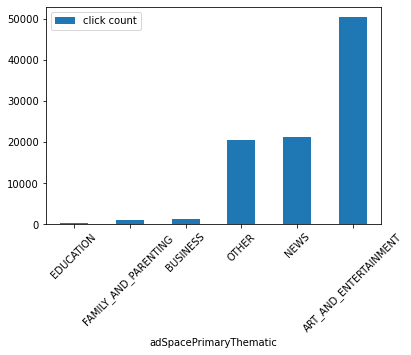

In [79]:
# visualization of the table

adspaceclick_count_df.plot.bar(label='Sex', rot = 45, fontsize=10)

# Conclusions from analysis 6
- Art and entertainment is still the top performing thematic, with 50,383 clicks
- News comes in third with 21,206 clicks
- Second place goes to a different combination of thematics, suggesting that our campaign can garner clicks, but only specific thematics can convert.

# Summary and conclusions

# Conclusion from analysis 1: Analyzing conversion and click count
- The mobile campaign has a total of 94,726 clicks, and 417 conversions recorded. Making the conversion rate 0.44%
- Not enough data to make a conclusion whether it is a low conversion rate or not. Product being promoted was not mentioned.
- But in general 0.44% conversion rate is relatively low.

# Conclusions from analysis 2: Analyzing conversion performance for the people who clicked in the last 24 hours
- A total of 7,911 clicks happened in the last 24 hours 7,719 people clicked once, 175 clicked twice and 17 clicked thrice
- Meaning most conversions, with 413, happened outside 24 hours and only 4 happend within the past 24 hours.
- The campaign is optimized to the consencious consumer and not the impulsive buyer. Suggesting that the item sold could be an item of the more expensive variety.

# Conclusions from analysis 3: Analysis on conversion and cities
- The single city that converted the most was Paris with 138, then Orange with 82.
- All the smaller cities combined converted more than Paris, but only by 7 more conversions.
- It would make better sense for the campaign to reallocate the budget more on the top converting cities compared to targetting multiple smaller cities.

# Conclusions from analysis 4: Analysis on clicks and cities
- Toulouse is in the top 5 clicks per city but this city not in the top 5 city conversions.
- When just looking at conversions, it looks like Paris is the best converting city, however 
a deeper dive shows us that Orange has a higher chance of converting. 
- Orange is almost 4 times more likely to convert than Paris, with a 2.73% to Paris' 0.70% conversion rate.
- It could be possible to focus the campaign more on Orange, and adjust the campaign being run in Paris.

# Conclusions from analysis 5: Primary Ad Space Thematic and Conversion Analysis
- Art and entertainment is the top converting ad space primary thematic with 198 conversions
- News is the second thematic with 110 conversions
- Most of the ads budget should be allocated these two thematics as 73.8% of conversions come from these two types of categories.


# Conclusions from analysis 6: Primary Ad Space Thematic and Click Analysis
- Art and entertainment is still the top performing thematic, with 50,383 clicks
- News comes in third with 21,206 clicks
- Second place goes to a different combination of thematics, suggesting that our campaign can garner clicks, but only specific thematics, such as Art & entertainment and News, can convert.